In [1]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

In [2]:
sb.competitions().competition_name.unique()

array(['1. Bundesliga', 'Champions League', 'Copa del Rey',
       "FA Women's Super League", 'FIFA U20 World Cup', 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'Liga Profesional', 'Ligue 1',
       'Major League Soccer', 'North American League', 'NWSL',
       'Premier League', 'Serie A', 'UEFA Euro', 'UEFA Europa League',
       "UEFA Women's Euro", "Women's World Cup"], dtype=object)

### Busco la Champions del año 2010/2011, ya que quiero analizar sobre la final, el mejor partido de fútbol que vi jugar por parte de un equipo fue el de ese Barcelona vs el Manchester United de Ferguson 

In [3]:
sb.competitions()[sb.competitions().competition_name == 'Champions League'].sort_values(by = 'season_name', ascending = False )

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
7,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
8,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
9,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
10,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [4]:
sb.matches(competition_id=16,season_id=22)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18236,2011-05-28,20:45:00.000,Europe - Champions League,2010/2011,Barcelona,Manchester United,3,1,available,...,2021-06-13T16:17:31.694,1,Final,Wembley Stadium,Viktor Kassai,Josep Guardiola i Sala,Alex Ferguson,1.0.3,None,None


### Menos mal, está ese partido sólo, por suerte era el que me interesaba. 

In [5]:
partido = sb.events(match_id=18236)

In [6]:
partido.player.value_counts()

player
Xavier Hernández Creus             460
Lionel Andrés Messi Cuccittini     413
Andrés Iniesta Luján               398
Daniel Alves da Silva              276
Sergio Busquets i Burgos           273
Wayne Mark Rooney                  196
Eric-Sylvain Bilal Abidal          182
Javier Alejandro Mascherano        176
Ji-Sung Park                       175
Ryan Giggs                         173
Pedro Eliezer Rodríguez Ledesma    167
Gerard Piqué Bernabéu              150
David Villa Sánchez                144
Rio Ferdinand                      142
Michael Carrick                    133
Luis Antonio Valencia Mosquera     124
Patrice Evra                       120
Nemanja Vidić                      111
Javier Hernández Balcázar           98
Edwin van der Sar                   98
Fábio Pereira da Silva              85
Víctor Valdés Arribas               72
Luís Carlos Almeida da Cunha        53
Paul Scholes                        52
Carles Puyol i Saforcada            16
Seydou Kéita      

### Voy a hacer un análisis del partido de Messi, Iniesta, Xavi y Valdés

In [7]:
iniesta = partido[partido['player'] == 'Andrés Iniesta Luján']
messi = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini']
xavi = partido[partido['player'] == 'Xavier Hernández Creus']
valdes = partido[partido['player'] == 'Víctor Valdés Arribas']
valdes.shape

(72, 74)

In [8]:
iniesta.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_type', 'period',

In [9]:
iniesta[['x','y']] = iniesta['location'].apply(lambda x: pd.Series(x))
messi[['x','y']] = messi['location'].apply(lambda x: pd.Series(x))
xavi[['x','y']] = xavi['location'].apply(lambda x: pd.Series(x))
valdes[['x','y']] = valdes['location'].apply(lambda x: pd.Series(x))
iniesta[['location', 'x', 'y']]
#Separo el array de location en dos valores distinguibles x e y

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3322129339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iniesta[['x','y']] = iniesta['location'].apply(lambda x: pd.Series(x))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3322129339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iniesta[['x','y']] = iniesta['location'].apply(lambda x: pd.Series(x))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3322129339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,location,x,y
34,"[31.0, 7.0]",31.0,7.0
91,"[29.0, 13.0]",29.0,13.0
99,"[76.0, 2.0]",76.0,2.0
133,"[74.0, 27.0]",74.0,27.0
149,"[77.0, 18.0]",77.0,18.0
...,...,...,...
4195,"[86.0, 56.0]",86.0,56.0
4248,"[48.0, 21.0]",48.0,21.0
4259,"[48.0, 23.0]",48.0,23.0
4261,"[48.0, 45.0]",48.0,45.0


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


<Axes: >

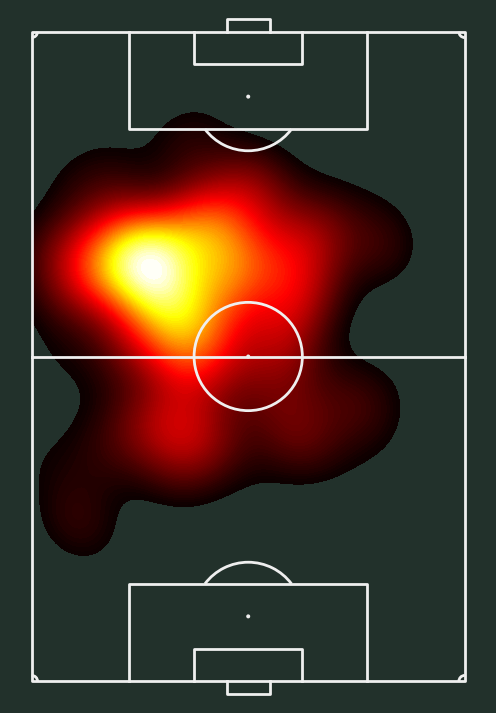

In [10]:
fig, ax = plt.subplots(ncols = 1, figsize=(16,9))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True, 
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax)

pitch.kdeplot(x = iniesta['x'], y = iniesta['y'], ax = ax,levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot')

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usua

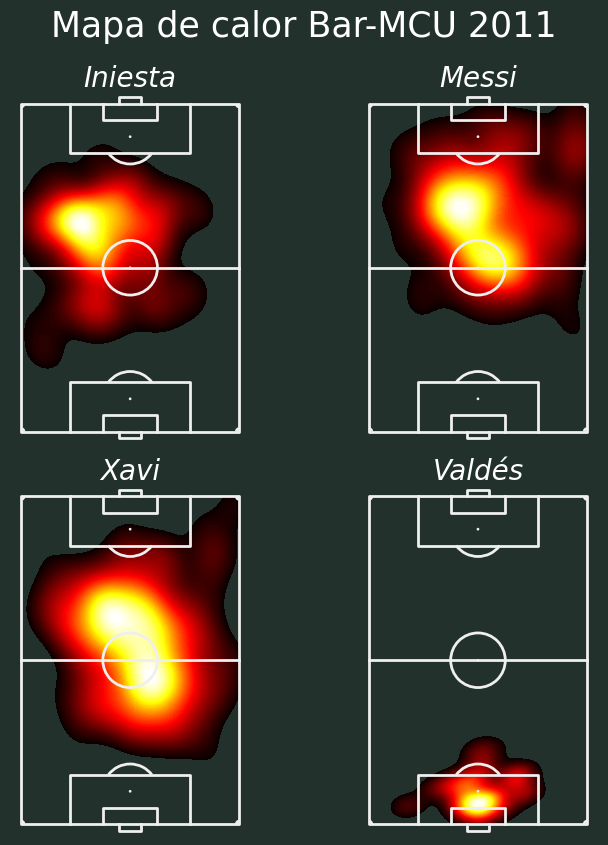

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(8,8))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    half = False,
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True
    )
fig.set_facecolor('#22312b')
pitch.draw(ax = ax[0,0])
pitch.draw(ax = ax[0,1])
pitch.draw(ax = ax[1,0])
pitch.draw(ax = ax[1,1])

#Ploteo los datos de Iniesta
pitch.kdeplot(x = iniesta['x'], y = iniesta['y'], ax = ax[0,0],levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot');
ax[0,0].set_title('Iniesta', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');

#Ploteo los datos de Messi
pitch.kdeplot(x = messi['x'], y = messi['y'], ax = ax[0,1],levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot');
ax[0,1].set_title('Messi', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');

#Ploteo los datos de Xavi
pitch.kdeplot(x = xavi['x'], y = xavi['y'], ax = ax[1,0],levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot');
ax[1,0].set_title('Xavi', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');

#Ploteo los datos de Valdes
pitch.kdeplot(x = valdes['x'], y = valdes['y'], ax = ax[1,1],levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot');
ax[1,1].set_title('Valdés', color='white', va='center', ha='center', fontsize = 20, fontfamily = 'Sans-serif',fontstyle=  'italic');

plt.tight_layout()
plt.suptitle('Mapa de calor Bar-MCU 2011', color='white', x= 0.5, y = 1.05, fontsize = 25, fontfamily = 'Sans-serif');

plt.savefig("Mapa de calor Jugadores Barca_final champions 2011", dpi = 300)

### Una alternativa para graficar usando ciclos For

#### Agrego 2 jugadores más 

In [12]:
partido.player.value_counts()

player
Xavier Hernández Creus             460
Lionel Andrés Messi Cuccittini     413
Andrés Iniesta Luján               398
Daniel Alves da Silva              276
Sergio Busquets i Burgos           273
Wayne Mark Rooney                  196
Eric-Sylvain Bilal Abidal          182
Javier Alejandro Mascherano        176
Ji-Sung Park                       175
Ryan Giggs                         173
Pedro Eliezer Rodríguez Ledesma    167
Gerard Piqué Bernabéu              150
David Villa Sánchez                144
Rio Ferdinand                      142
Michael Carrick                    133
Luis Antonio Valencia Mosquera     124
Patrice Evra                       120
Nemanja Vidić                      111
Javier Hernández Balcázar           98
Edwin van der Sar                   98
Fábio Pereira da Silva              85
Víctor Valdés Arribas               72
Luís Carlos Almeida da Cunha        53
Paul Scholes                        52
Carles Puyol i Saforcada            16
Seydou Kéita      

In [13]:
rooney = partido[partido['player'] == 'Wayne Mark Rooney']
scholes = partido[partido['player'] == 'Paul Scholes']
scholes.shape

(52, 74)

In [14]:
rooney[['x','y']] = rooney['location'].apply(lambda x: pd.Series(x))
scholes[['x','y']] = scholes['location'].apply(lambda x: pd.Series(x))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3846920920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooney[['x','y']] = rooney['location'].apply(lambda x: pd.Series(x))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3846920920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooney[['x','y']] = rooney['location'].apply(lambda x: pd.Series(x))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11644\3846920920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
c:\Users\Usua

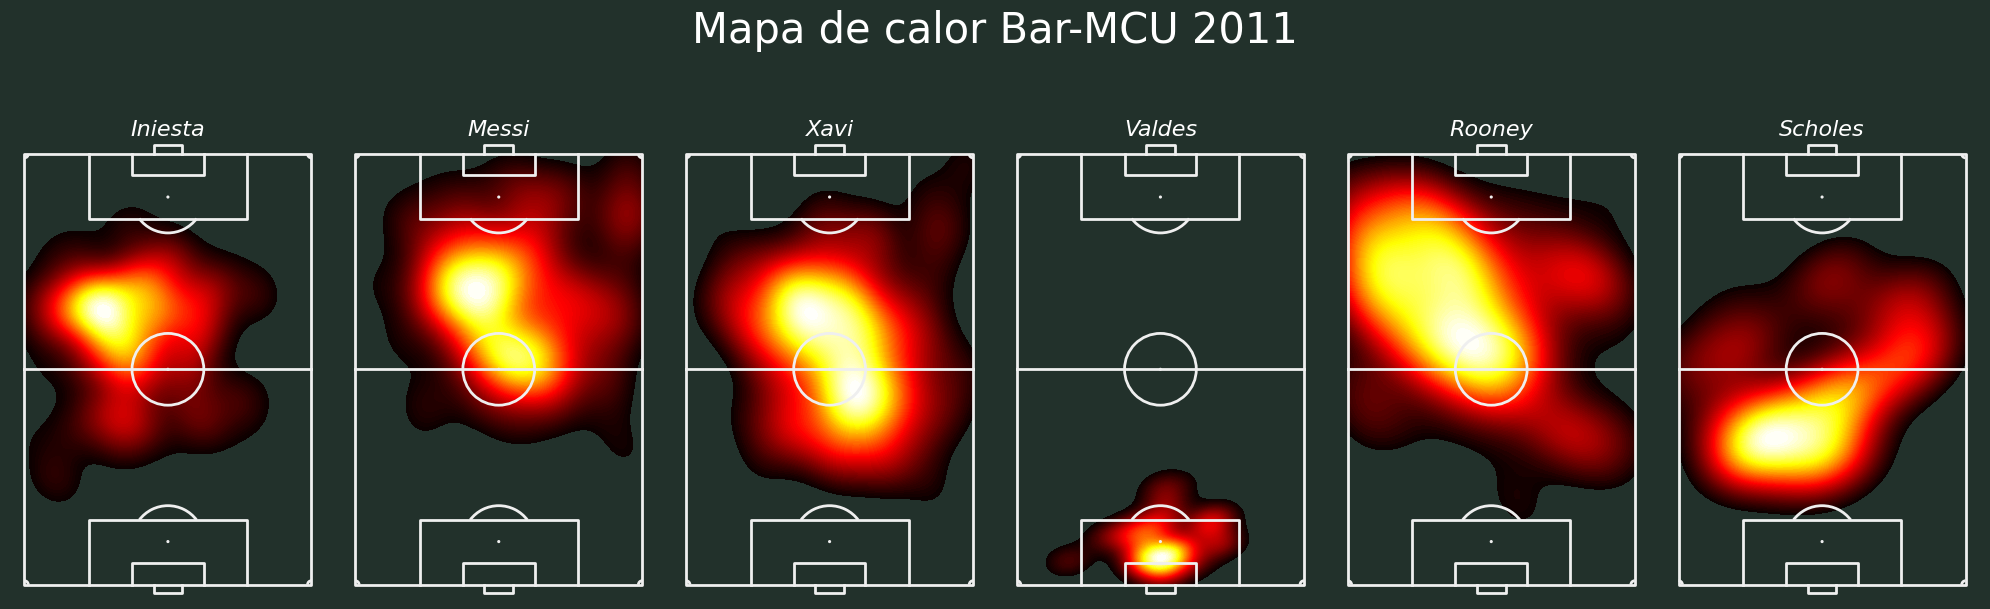

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize=(20,12))
pitch = VerticalPitch(
    pitch_type= 'statsbomb',
    axis = False,
    label = False,
    tick = False,
    goal_type = 'box', 
    linestyle= '-', 
    half = False,
    # pitch_color= 'grass',
    pitch_color='#22312b', line_color='#efefef',
    # stripe = True, 
    # stripe_color= 'Grey',
    corner_arcs= True
    )
fig.set_facecolor('#22312b')

ncols = [0,1,2,3,4,5]

dicc = {'iniesta' : iniesta,
      'messi' : messi,
      'xavi' : xavi,
      'valdes' : valdes,
      'rooney' : rooney,
      'scholes' : scholes,
      }
jugadores = ['iniesta','messi','xavi','valdes','rooney','scholes']

for col in ncols:
    pitch.draw(ax = ax[col])
    pitch.kdeplot(x = dicc[jugadores[col]]['x'], y = dicc[jugadores[col]]['y'], ax = ax[col],levels = 100, zorder = -1 ,shade = True, shade_lowest = False, cmap = 'hot')
    ax[col].set_title(f'{jugadores[col]}'.capitalize(), color='white', va='center', ha='center', fontsize = 16, fontfamily = 'Sans-serif',fontstyle=  'italic');

plt.tight_layout()
plt.suptitle('Mapa de calor Bar-MCU 2011', color='white', x= 0.5, y = 0.8, fontsize = 30, fontfamily = 'Sans-serif');
plt.savefig("Mapa de calor Jugadores Barca_final champions 2011 (parte 2)", dpi = 300)